In [2]:
import json
import glob
import numpy as np
import cv2
import copy
import dlib

In [2]:
import tensorflow.keras as keras

model = keras.models.load_model("lstm_model.h5")


In [4]:
#change the path accordingly
video_files =  glob.glob('D:/AI PROJECT/Data/dataset/Fake/*.mp4')
#video_files1 =  glob.glob('/content/dfdc_train_part_0/*.mp4')
#video_files += video_files1

frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<150):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames" , frame_count)
print("Total number of videos: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

frames [469, 303, 350, 529, 326, 459, 534, 479, 464, 520, 469, 303, 350, 529, 459, 534, 479, 520, 469, 303, 350, 529, 459, 534, 479, 520, 469, 303, 350, 529, 326, 459, 534, 479, 520, 469, 303, 350, 529, 326, 459, 534, 479, 520, 469, 303, 350, 326, 459, 479, 520, 469, 303, 350, 529, 326, 459, 534, 479, 464, 520, 469, 303, 350, 529, 326, 459, 534, 479, 464, 520, 469, 303, 350, 529, 326, 459, 534, 479, 464, 520, 469, 303, 350, 529, 326, 459, 534, 479, 464, 520, 469, 303, 350, 529, 326, 459, 534, 520, 469, 303, 350, 534, 479, 520, 469, 303, 350, 529, 459, 534, 479, 464, 520, 343, 517, 318, 161, 496, 380, 343, 517, 318, 161, 496, 380, 343, 517, 318, 161, 496, 380, 343, 517, 318, 161, 496, 380, 535, 349, 441, 357, 313, 337, 327, 316, 320, 371, 397, 330, 398, 364, 339, 314, 308, 376, 398, 364, 339, 314, 308, 327, 349, 340, 352, 309, 452, 459, 466, 510, 390, 489, 327, 349, 400, 340, 352, 309, 452, 459, 435, 466, 510, 489, 317, 316, 363, 303, 410, 345, 224, 284, 315, 325, 272, 308, 311, 317, 31

In [5]:
import tensorflow as tf

# Check if GPU is available
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"Number of GPUs available: {len(gpus)}")
    for gpu in gpus:
        print(f"GPU: {gpu}")
else:
    print("No GPU available.")


Number of GPUs available: 1
GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [56]:
# Base directory where images should be saved
# base_dir = "D:\\AI PROJECT\\Data\\framedataset\\Real\\"
base_dir = "D:\\AI PROJECT\\Data\\framedataset\\Fake\\"

# Get all video file paths
# video_files = glob.glob('D:/AI PROJECT/Data/dataset/Real/*.mp4')
video_files = glob.glob('D:/AI PROJECT/Data/dataset/Fake/*.mp4')

detector = dlib.get_frontal_face_detector()

if not detector:
    print("Error: Face detector not loaded successfully.")
else:
    print("Face detector loaded successfully.")

# Ensure the base output directory exists
if not os.path.exists(base_dir):
    os.makedirs(base_dir)

Face detector loaded successfully.


DATA PREPROCESSING

In [57]:
def getFrame(vidcap, output_folder, max_frames=5):
    count = 0
    faces_detected = 0
    while faces_detected < max_frames:
        hasFrames, image = vidcap.read()
        if hasFrames:
            # Convert image to grayscale
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            # Detect faces in the grayscale image
            faces = detector(gray)
            # Check if faces are detected
            print(f"Number of faces detected: {len(faces)}")
            if len(faces) >= 1:
                faces_detected += 1
                # Get the first detected face
                face = faces[0]
                # Calculate bounding box coordinates
                x = face.left()
                y = face.top()
                w = face.width()
                h = face.height()
                # Calculate center of the detected face
                center_x = x + w // 2
                center_y = y + h // 2
                # Define the size of the cropped image
                crop_size = 200
                # Calculate the cropping region
                x_crop = max(0, center_x - crop_size // 2)
                y_crop = max(0, center_y - crop_size // 2)
                x_end = min(image.shape[1], x_crop + crop_size)
                y_end = min(image.shape[0], y_crop + crop_size)
                # Crop the image
                cropped = image[y_crop:y_end, x_crop:x_end]
                # Check if face is present in cropped image
                gray_cropped = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
                if detector(gray_cropped):
                    # Resize the cropped image to desired size
                    cropped = cv2.resize(cropped, (200, 200))
                    # Save the cropped image
                    image_path = os.path.join(output_folder, f"image{str(count)}.jpg")
                    cv2.imwrite(image_path, cropped)
                    count += 1
                    print(f"Frame {count} saved.")
                else:
                    print("No face detected in cropped image. Skipping...")
        else:
            # No more frames left in the video
            break


# Iterate over each video file
for video_path in video_files[:5000]:
    # Extract the video file name without extension to create a folder
    video_name = os.path.basename(video_path).split('.')[0]
    output_dir = os.path.join(base_dir, video_name)  # Folder path based on the video name
    # Check if the output directory already exists
    if os.path.exists(output_dir):
        print(f"Frames already extracted from {video_name}. Skipping...")
        continue  # Move to the next video
    # Open the video file
    vidcap = cv2.VideoCapture(video_path)
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)
    # Extract frames from the video
    getFrame(vidcap, output_dir, max_frames=5)
    # Close the video file handle
    vidcap.release()


Number of faces detected: 1
Frame 1 saved.
Number of faces detected: 1
Frame 2 saved.
Number of faces detected: 1
Frame 3 saved.
Number of faces detected: 1
Frame 4 saved.
Number of faces detected: 1
Frame 5 saved.
Number of faces detected: 1
Frame 1 saved.
Number of faces detected: 1
Frame 2 saved.
Number of faces detected: 1
Frame 3 saved.
Number of faces detected: 1
Frame 4 saved.
Number of faces detected: 1
Frame 5 saved.
Number of faces detected: 1
Frame 1 saved.
Number of faces detected: 1
Frame 2 saved.
Number of faces detected: 1
Frame 3 saved.
Number of faces detected: 1
Frame 4 saved.
Number of faces detected: 1
Frame 5 saved.
Number of faces detected: 1
Frame 1 saved.
Number of faces detected: 1
Frame 2 saved.
Number of faces detected: 1
Frame 3 saved.
Number of faces detected: 1
Frame 4 saved.
Number of faces detected: 1
Frame 5 saved.
Number of faces detected: 1
No face detected in cropped image. Skipping...
Number of faces detected: 1
Frame 1 saved.
Number of faces detect

In [5]:
import cv2

def preprocess_image(image, target_size=(160, 160)):
    # Resize the image to the target size
    resized_image = cv2.resize(image, target_size)
    
    # Convert the pixel values to float32
    resized_image = resized_image.astype('float32')
    
    # Normalize the pixel values to the range [0, 1]
    normalized_image = resized_image / 255.0
    
    return normalized_image


In [9]:
import tensorflow as tf
from keras_facenet import FaceNet
import cv2
import os
import numpy as np

# Load the FaceNet model
face_net = FaceNet()

# Define the base directory where all the folders containing face images are stored
base_dir = "D:\\AI PROJECT\\Data\\framedataset\\Real"

# List to store face embeddings for each image
face_embeddings = []

# Iterate over each folder in the base directory
for folder_name in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder_name)
    if os.path.isdir(folder_path):
        # print(f"Processing folder: {folder_path}")
        # Iterate over each image in the folder
        for filename in os.listdir(folder_path):
            # Read the image
            image_path = os.path.join(folder_path, filename)
            print(f"Reading image: {image_path}")
            image = cv2.imread(image_path)

            # Preprocess the image (resize, normalize, etc.)
            # print("Preprocessing image...")
            preprocessed_image = preprocess_image(image)  # Implement your own preprocess_image function
            # print("Image preprocessed.")

            # Expand dimensions to include batch size
            preprocessed_image = np.expand_dims(preprocessed_image, axis=0)

            # Extract face embedding using FaceNet
            # print("Extracting face embedding...")
            embedding = face_net.embeddings(preprocessed_image)
            # print("Face embedding extracted.")

            # Append the face embedding to the list
            face_embeddings.append(embedding)

print("All images processed.")

# Now you have a list of face embeddings for each face image in your dataset
# You can use these embeddings as input to train your classifier for deepfake detection


Reading image: D:\AI PROJECT\Data\framedataset\Real\id0_0000\image0.jpg
1/1 [==============================] - 6s 6s/step
Reading image: D:\AI PROJECT\Data\framedataset\Real\id0_0000\image1.jpg
1/1 [==============================] - 0s 23ms/step
Reading image: D:\AI PROJECT\Data\framedataset\Real\id0_0000\image2.jpg
1/1 [==============================] - 0s 21ms/step
Reading image: D:\AI PROJECT\Data\framedataset\Real\id0_0000\image3.jpg
1/1 [==============================] - 0s 21ms/step
Reading image: D:\AI PROJECT\Data\framedataset\Real\id0_0000\image4.jpg
1/1 [==============================] - 0s 21ms/step
Reading image: D:\AI PROJECT\Data\framedataset\Real\id0_0001\image0.jpg
1/1 [==============================] - 0s 21ms/step
Reading image: D:\AI PROJECT\Data\framedataset\Real\id0_0001\image1.jpg
1/1 [==============================] - 0s 26ms/step
Reading image: D:\AI PROJECT\Data\framedataset\Real\id0_0001\image2.jpg
1/1 [==============================] - 0s 24ms/step
Reading im

In [10]:
import tensorflow as tf
from keras_facenet import FaceNet
import cv2
import os
import numpy as np

# Load the FaceNet model
face_net = FaceNet()

# Define the base directory where all the folders containing face images are stored
base_dir = "D:\\AI PROJECT\\Data\\framedataset\\Fake"

# List to store face embeddings for each image
fake_face_embeddings = []

# Iterate over each folder in the base directory
for folder_name in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder_name)
    if os.path.isdir(folder_path):
        # print(f"Processing folder: {folder_path}")
        # Iterate over each image in the folder
        for filename in os.listdir(folder_path):
            # Read the image
            image_path = os.path.join(folder_path, filename)
            print(f"Reading image: {image_path}")
            image = cv2.imread(image_path)

            # Preprocess the image (resize, normalize, etc.)
            # print("Preprocessing image...")
            preprocessed_image = preprocess_image(image)  # Implement your own preprocess_image function
            # print("Image preprocessed.")

            # Expand dimensions to include batch size
            preprocessed_image = np.expand_dims(preprocessed_image, axis=0)

            # Extract face embedding using FaceNet
            # print("Extracting face embedding...")
            embedding = face_net.embeddings(preprocessed_image)
            # print("Face embedding extracted.")

            # Append the face embedding to the list
            fake_face_embeddings.append(embedding)

print("All images processed.")


Reading image: D:\AI PROJECT\Data\framedataset\Fake\id0_id16_0000\image0.jpg
1/1 [==============================] - 1s 1s/step
Reading image: D:\AI PROJECT\Data\framedataset\Fake\id0_id16_0000\image1.jpg
1/1 [==============================] - 0s 21ms/step
Reading image: D:\AI PROJECT\Data\framedataset\Fake\id0_id16_0000\image2.jpg
1/1 [==============================] - 0s 23ms/step
Reading image: D:\AI PROJECT\Data\framedataset\Fake\id0_id16_0000\image3.jpg
1/1 [==============================] - 0s 19ms/step
Reading image: D:\AI PROJECT\Data\framedataset\Fake\id0_id16_0000\image4.jpg
1/1 [==============================] - 0s 20ms/step
Reading image: D:\AI PROJECT\Data\framedataset\Fake\id0_id16_0001\image0.jpg
1/1 [==============================] - 0s 20ms/step
Reading image: D:\AI PROJECT\Data\framedataset\Fake\id0_id16_0001\image1.jpg
1/1 [==============================] - 0s 23ms/step
Reading image: D:\AI PROJECT\Data\framedataset\Fake\id0_id16_0001\image2.jpg
1/1 [=================

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming face_embeddings and fake_face_embeddings are already defined.

# Create labels for real and fake data
real_labels = np.ones(len(face_embeddings))  # Label real embeddings as 1
fake_labels = np.zeros(len(fake_face_embeddings))  # Label fake embeddings as 0

# Convert the list of embeddings to NumPy arrays
real_X = np.array(face_embeddings)
fake_X = np.array(fake_face_embeddings)

# Print the shapes of the arrays to verify their dimensions
print("Shape of real_X:", real_X.shape)
print("Shape of fake_X:", fake_X.shape)

Shape of real_X: (2893, 1, 512)
Shape of fake_X: (24815, 1, 512)


In [13]:
# Concatenate the real and fake data and their labels
X = np.concatenate((real_X, fake_X), axis=0)
y = np.concatenate((real_labels, fake_labels), axis=0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train, X_test, y_train, and y_test are now ready for training and testing.


In [14]:
import numpy as np

# Define the file paths
X_train_path = 'X_train.npy'
X_test_path = 'X_test.npy'
y_train_path = 'y_train.npy'
y_test_path = 'y_test.npy'

# Save the arrays to .npy files
np.save(X_train_path, X_train)
np.save(X_test_path, X_test)
np.save(y_train_path, y_train)
np.save(y_test_path, y_test)

print("Arrays have been saved successfully.")


Arrays have been saved successfully.


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Prepare data (X: sequences of face embeddings, y: corresponding labels)
# Example code assumes you have X_train, X_test, y_train, y_test

# Define model architecture
model = Sequential([
    LSTM(units=64,activation='relu' ,input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(units=32),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
])

from tensorflow.keras.optimizers import Adam
optimizer = Adam(clipvalue=0.5)  # Clips gradient norm
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])



NameError: name 'X_train' is not defined

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 64)             147712    
                                                                 
 dropout_4 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 160,161
Trainable params: 160,161
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Epoch 1/10
693/693 [==============================] - 7s 8ms/step - loss: 0.3555 - accuracy: 0.1049 - val_loss: 0.3368 - val_accuracy: 0.1025
Epoch 2/10
693/693 [==============================] - 5s 8ms/step - loss: 0.3387 - accuracy: 0.1049 - val_loss: 0.3315 - val_accuracy: 0.1025
Epoch 3/10
481/693 [===================>..........] - ETA: 1s - loss: 0.3404 - accuracy: 0.1054

KeyboardInterrupt: 

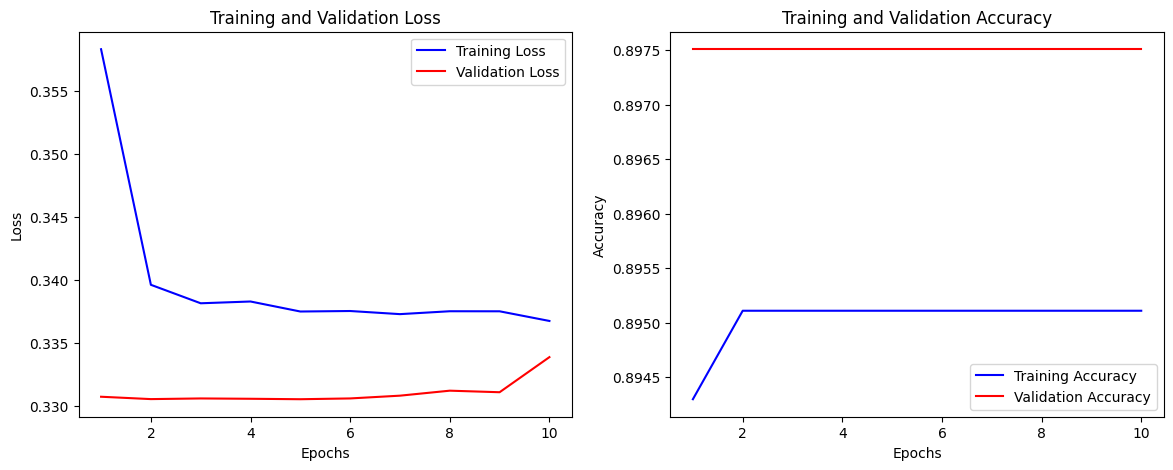

In [18]:
import matplotlib.pyplot as plt

# Plot the training history
def plot_training_history(history):
    # Get the values from the history
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Number of epochs
    epochs = range(1, len(train_loss) + 1)

    # Plot loss
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Show the plots
    plt.show()

# Call the function to plot the training history
plot_training_history(history)

In [19]:
model.save('lstm_model.h5')

In [ ]:

import cv2
import dlib
import numpy as np
from keras_facenet import FaceNet
from tensorflow.keras.models import load_model


# Load FaceNet model for face feature extraction
face_net = FaceNet()

# Load your model for deepfake detection
model = load_model('path_to_save_model.h5')



In [42]:
import cv2
import dlib
import numpy as np
from keras_facenet import FaceNet
from tensorflow.keras.models import load_model


# Load FaceNet model for face feature extraction
face_net = FaceNet()

# Load your model for deepfake detection
model = load_model('path_to_save_model.h5')  # Replace 'path_to_your_model.h5' with the actual path

def prepare_single_video(video_path):
    # Load FaceNet model for face feature extraction
    face_net = FaceNet()
    
    # Initialize dlib face detector
    detector = dlib.get_frontal_face_detector()
    
    # Open the video file
    vidcap = cv2.VideoCapture(video_path)
    
    # List to store extracted frames and face features
    video_frames = []
    face_features = []
    
    # Loop through each frame in the video
    while True:
        # Read the next frame
        success, frame = vidcap.read()
        if not success:
            break  # End of video
        
        # Extract faces from the frame
        faces = detector(frame)
        
        # Loop through each detected face
        for face in faces:
            # Get face bounding box coordinates
            x, y, w, h = face.left(), face.top(), face.width(), face.height()
            
            # Crop the face from the frame
            face_image = frame[y:y+h, x:x+w]
            
            # Preprocess face image (resize, normalize, etc.)
            preprocessed_face = cv2.resize(face_image, (160, 160))  # Resize to (160, 160)
            
            # Extract face features using FaceNet
            face_feature = face_net.embeddings(preprocessed_face)
            
            # Append the frame and face features to the lists
            video_frames.append(frame)
            face_features.append(face_feature)
    
    # Release the video capture object
    vidcap.release()
    
    return video_frames, face_features

# Example usage
video_path = 'D:/AI PROJECT/Data/dataset/Real/id0_0003.mp4'
video_frames, face_features = prepare_single_video(video_path)

# Make predictions using the loaded model
predictions = model.predict(face_features)

# Process predictions based on model output
if len(predictions.shape) == 1:
    # Single output neuron, convert probabilities to class labels
    class_labels = (predictions > 0.5).astype(int)
else:
    # Multiple output neurons, use argmax to get the predicted class labels
    class_labels = np.argmax(predictions, axis=1)

print(class_labels)


ValueError: in user code:

    File "c:\Users\qasim\anaconda3\envs\new_tf_env\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\qasim\anaconda3\envs\new_tf_env\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\qasim\anaconda3\envs\new_tf_env\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\qasim\anaconda3\envs\new_tf_env\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "c:\Users\qasim\anaconda3\envs\new_tf_env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\qasim\anaconda3\envs\new_tf_env\lib\site-packages\keras\engine\input_spec.py", line 250, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "inception_resnet_v1" "                 f"(type Functional).
    
    Input 0 of layer "Conv2d_1a_3x3" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (32, 160, 160)
    
    Call arguments received by layer "inception_resnet_v1" "                 f"(type Functional):
      • inputs=tf.Tensor(shape=(32, 160, 160), dtype=float32)
      • training=False
      • mask=None


In [7]:
import tensorflow as tf
from keras_facenet import FaceNet
import cv2
import os
import numpy as np

# Load the FaceNet model
face_net = FaceNet()

# Define the video file path
video_path = "D:/AI PROJECT/Data/celeb-def-v2/Celeb-real/id0_0000.mp4"

# Open the video file
cap = cv2.VideoCapture(video_path)

# List to store face embeddings for each frame
face_embeddings = []

# Counter to keep track of detected faces
faces_detected = 0

# Loop through each frame in the video
while faces_detected < 5:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Preprocess the frame (resize, normalize, etc.)
    preprocessed_frame = preprocess_image(frame)  # Implement your own preprocess_image function
    
    # Expand dimensions to include batch size
    preprocessed_frame = np.expand_dims(preprocessed_frame, axis=0)
    
    # Extract face embedding using FaceNet
    embedding = face_net.embeddings(preprocessed_frame)
    
    # Check if a face is detected
    if embedding is not None:
        # Increment the counter
        faces_detected += 1
        
        # Append the face embedding to the list
        face_embeddings.append(embedding)

# Release the video capture object
cap.release()

print("Face embeddings extracted for 5 frames with detected faces.")


1/1 [==============================] - 0s 25ms/step
Face embeddings extracted for 5 frames with detected faces.


In [8]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load your pre-trained model
model_path = "lstm_model.h5"
model = load_model(model_path)

# Assuming you have a list of face embeddings stored in face_embeddings

# Convert the list of face embeddings to a numpy array
face_embeddings_array = np.array(face_embeddings)

# Make predictions using the loaded model
predictions = model.predict(face_embeddings_array)

# Assuming predictions are probabilities, you can print them
print("Predictions:", predictions)

# You can then further process the predictions as needed


1/1 [==============================] - 1s 627ms/step
Predictions: [[0.12905577]
 [0.12905577]
 [0.12905577]
 [0.12905577]
 [0.12905577]]


In [21]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report

# Step 1: Load your model
model = load_model('lstm_model.h5')

# Step 3: Predict the outputs
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) if model.output_shape[-1] > 1 else (y_pred > 0.5).astype('int32')

# Step 4: Calculate precision and recall
report = classification_report(y_test, y_pred_classes, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']

print(f"Precision: {precision}")
print(f"Recall: {recall}")


174/174 [==============================] - 1s 2ms/step
Precision: 0.8055240640645673
Recall: 0.8975099242150848


c:\Users\qasim\anaconda3\envs\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\qasim\anaconda3\envs\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\qasim\anaconda3\envs\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


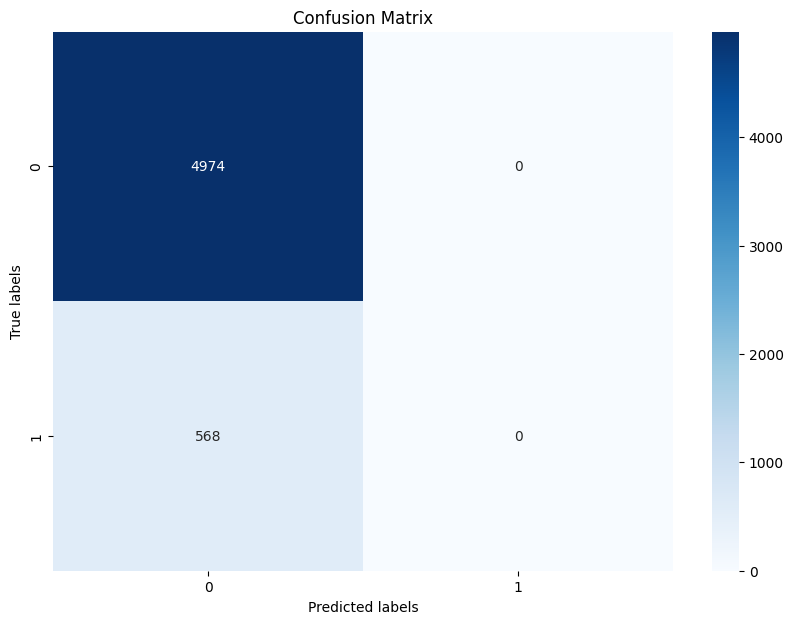

In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_pred_classes and y_test are already defined from your previous model evaluation
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')  # 'g' format to avoid scientific notation
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [24]:
# Example for binary classification
TN, FP, FN, TP = cm.ravel()

print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)


True Positives (TP): 0
False Positives (FP): 0
True Negatives (TN): 4974
False Negatives (FN): 568
